In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
from functions import *
path = '/Users/yujiaxie/Desktop/Capstone/'
path

'/Users/yujiaxie/Desktop/Capstone/'

In [159]:
household_df = pd.read_csv(path+"household/household_data_1min_singleindex.csv",parse_dates=['utc_timestamp'])
timeseries_df = pd.read_csv(path+"timeseries/time_series_15min_singleindex.csv",parse_dates=['utc_timestamp','cet_cest_timestamp'])
weather_df = pd.read_csv(path+"weather/weather_data.csv",parse_dates=['utc_timestamp'])

In [160]:
household, timeseries, weather = preproc(household_df, timeseries_df, weather_df)

@0.949s taken for {preproc}


In [161]:
householdL, cum_householdL = clean_data(household)

@64.460s taken for {clean_data}


In [162]:
householdL[0]

,day,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,export_consumption_sum,import_generation_sum
0,2016-01-02,328.500,4.920,3.540,0.0,336.960
1,2016-01-03,427.000,4.150,2.990,0.0,434.140
2,2016-01-04,642.000,4.840,3.900,0.0,650.740
3,2016-01-05,673.500,6.290,5.260,0.0,685.050
4,2016-01-06,669.625,2.360,1.490,0.0,673.475
...,...,...,...,...,...,...
418,2017-02-23,703.141,16.030,11.319,0.0,730.490
419,2017-02-24,650.046,10.371,7.951,0.0,668.368
420,2017-02-25,363.235,19.070,13.180,0.0,395.485
421,2017-02-26,466.922,12.739,8.659,0.0,488.320


In [178]:
cum_householdL[0]

,day,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,export_consumption_sum,import_generation_sum
0,2016-01-02,18491.250,363.890,243.605,0.0,19098.745
1,2016-01-03,18918.250,368.040,246.595,0.0,19532.885
2,2016-01-04,19560.250,372.880,250.495,0.0,20183.625
3,2016-01-05,20233.750,379.170,255.755,0.0,20868.675
4,2016-01-06,20903.375,381.530,257.245,0.0,21542.150
...,...,...,...,...,...,...
418,2017-02-23,292194.227,5609.262,4417.783,0.0,302221.272
419,2017-02-24,292844.273,5619.633,4425.734,0.0,302889.640
420,2017-02-25,293207.508,5638.703,4438.914,0.0,303285.125
421,2017-02-26,293674.430,5651.442,4447.573,0.0,303773.445


# timeseries data overview

This timeseries dataset contains electricity prices, electricity consumption (load) as well as wind and solar power generation and capacities for the power system modelling. The data is aggregated either by country, control area or bidding zone. Geographical coverage includes the EU and some neighbouring countries, covering the period 2015-mid 2020. 

However, since household dataset is only available from 2016-01-02 to 2017-02-27 and it only has Germany(DE) data, we only focus timeseries data in Germany that following this time range. The relagional data is also excluded.

In [204]:
t = timeseries.copy()
t.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_LU_load_actual_entsoe_transparency',
       'DE_LU_load_forecast_entsoe_transparency',
       'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual',
       'DE_LU_wind_offshore_g

In [325]:
t = t[(t.utc_timestamp > '2016-01-02') & (t.utc_timestamp < '2017-02-28')] # same time interval as household
tmp = [c for c in t.columns if 'load' not in c and 'LU' not in c and 'amprion' not in c and 'transnetbw' not in c and 'tennet' not in c and '50hertz' not in c and 'profile' not in c and 'offshore' not in c and 'onshore' not in c]
t = t[tmp] # exclude DE-LU (bidding zone) and control areas
#t = t[['DE_solar_capacity', 'DE_wind_capacity','DE_wind_offshore_capacity','DE_wind_onshore_capacity']] # only include meaningful features
t['day'] = pd.to_datetime(t.utc_timestamp.apply(lambda x: x.date()))
daily_t = t.groupby('day').mean().reset_index().round(3) # use mean or max?
daily_t

,day,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
0,2016-01-02,38632.000,408.826,32812.000,17428.522
1,2016-01-03,38632.500,563.292,32812.000,16929.042
2,2016-01-04,38644.042,420.000,32812.000,11602.542
3,2016-01-05,38645.083,522.917,32812.208,8602.833
4,2016-01-06,38647.125,524.625,32817.000,6501.625
...,...,...,...,...,...
418,2017-02-23,40267.208,2113.375,37761.958,29391.875
419,2017-02-24,40272.000,2939.375,37784.375,21754.458
420,2017-02-25,40272.000,4065.833,37793.000,17240.417
421,2017-02-26,40272.208,2477.000,37794.458,22714.250


## Deal with outliers in DE_solar_generation_actual

In [358]:
daily_t[daily_t.DE_solar_generation_actual < 5]

,day,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
151,2016-06-01,38991.250,0.0,34239.250,7336.0
300,2016-10-28,39456.417,0.0,35985.250,11427.0
342,2016-12-09,39699.000,0.0,36538.292,20040.0


In [359]:
# replace 0 with lagging value
daily_t.at[151,'DE_solar_generation_actual'] = daily_t.loc[152, 'DE_solar_generation_actual']
daily_t.at[300,'DE_solar_generation_actual'] = daily_t.loc[301, 'DE_solar_generation_actual']
daily_t.at[342,'DE_solar_generation_actual'] = daily_t.loc[343, 'DE_solar_generation_actual']
daily_t[daily_t.DE_solar_generation_actual < 5]

,day,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual


### cumulative timeseries dataframe

In [361]:
cum_daily_t = daily_t.loc[:, daily_t.columns!='day'].cumsum(axis = 0).round(2)
cum_daily_t.insert(0, 'day', pd.date_range(start='2016-01-02', end='2017-02-27'))
cum_daily_t

,day,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
0,2016-01-02,38632.00,408.83,32812.00,17428.52
1,2016-01-03,77264.50,972.12,65624.00,34357.56
2,2016-01-04,115908.54,1392.12,98436.00,45960.11
3,2016-01-05,154553.62,1915.04,131248.21,54562.94
4,2016-01-06,193200.75,2439.66,164065.21,61064.56
...,...,...,...,...,...
418,2017-02-23,16445183.34,1521299.56,14669819.29,3827028.47
419,2017-02-24,16485455.34,1524238.93,14707603.67,3848782.92
420,2017-02-25,16525727.34,1528304.77,14745396.67,3866023.34
421,2017-02-26,16565999.55,1530781.77,14783191.13,3888737.59


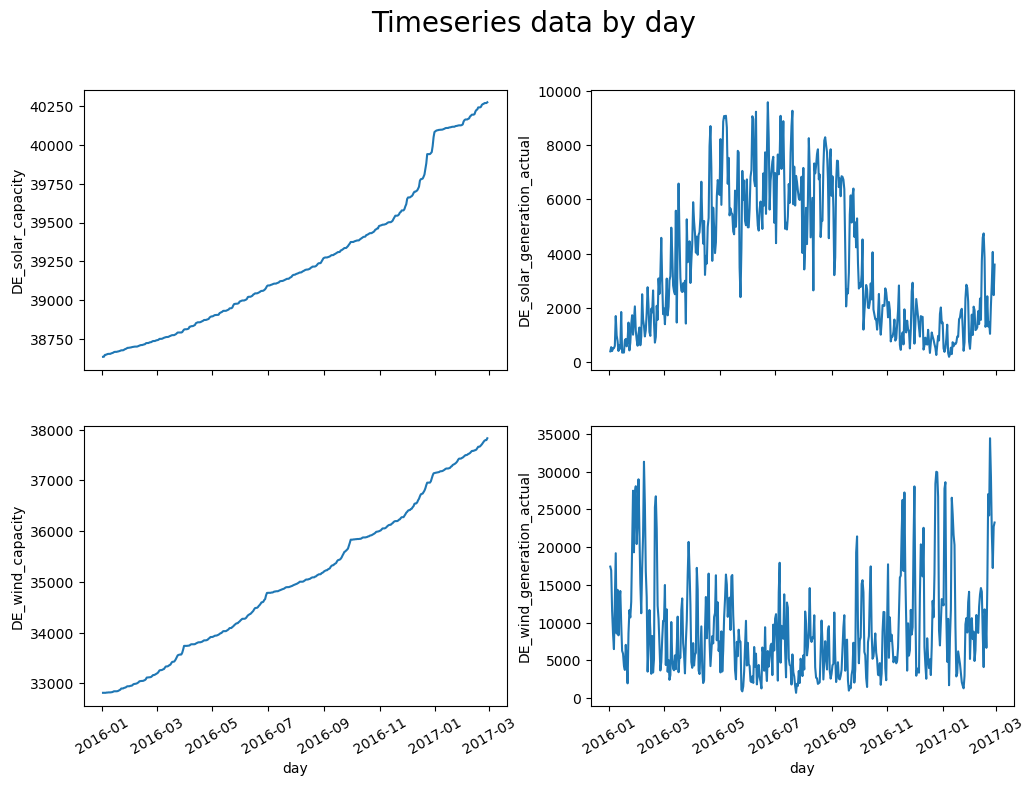

In [362]:
metric_names = [c for c in daily_t.columns if c != 'day']

fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True)
for c, subplot in zip(metric_names[:], ax.flatten()):
    sns.lineplot(data=daily_t, x='day', y=c, ax=subplot)
    subplot.tick_params(axis='x', rotation=30);
fig.suptitle('Timeseries data by day', fontsize=20);

Besides some outlier, the general trend for solar and wind capacity is increasing overtime. As for the solar generation, the generations tends to be high during summer time and low during winter time, which is intuively make sense as sunlight is more abundant in summer than in winter. The wind generation does not follow a specific pattern and we do not see clear seasonality. 

We would like to see how the wind capacity/generation and solar capacity/generation in timeseries dataset are correlated with import/export/consumption/generation in the household dataset.

In [318]:
# sns.lineplot(data=daily_t, x='day', y='DE_amprion_load_actual_entsoe_transparency');

In [319]:
def plot_line(df, metrics, include):
    metrics = [c for c in metrics if include in c]
    date = df["day"]
    cm = plt.get_cmap('gist_rainbow')
    if len(metrics) == 0:
        return
    fig, ax = plt.subplots(figsize=(20, 10))
    color_map = [cm(1.*i/len(metrics)) for i in range(len(metrics))]
    for i,c in enumerate(metrics):
        value = df[c]
        ax.plot(date, value, color = color_map[i], label = c)
    #ax.set_title("{} summary".format(df.name), fontsize = 15)
    ax.set_xlabel("timestamp", fontsize = 10)
    ax.set_ylabel("kWh", fontsize = 10)
    ax.legend(loc="upper left")
    plt.show()
    

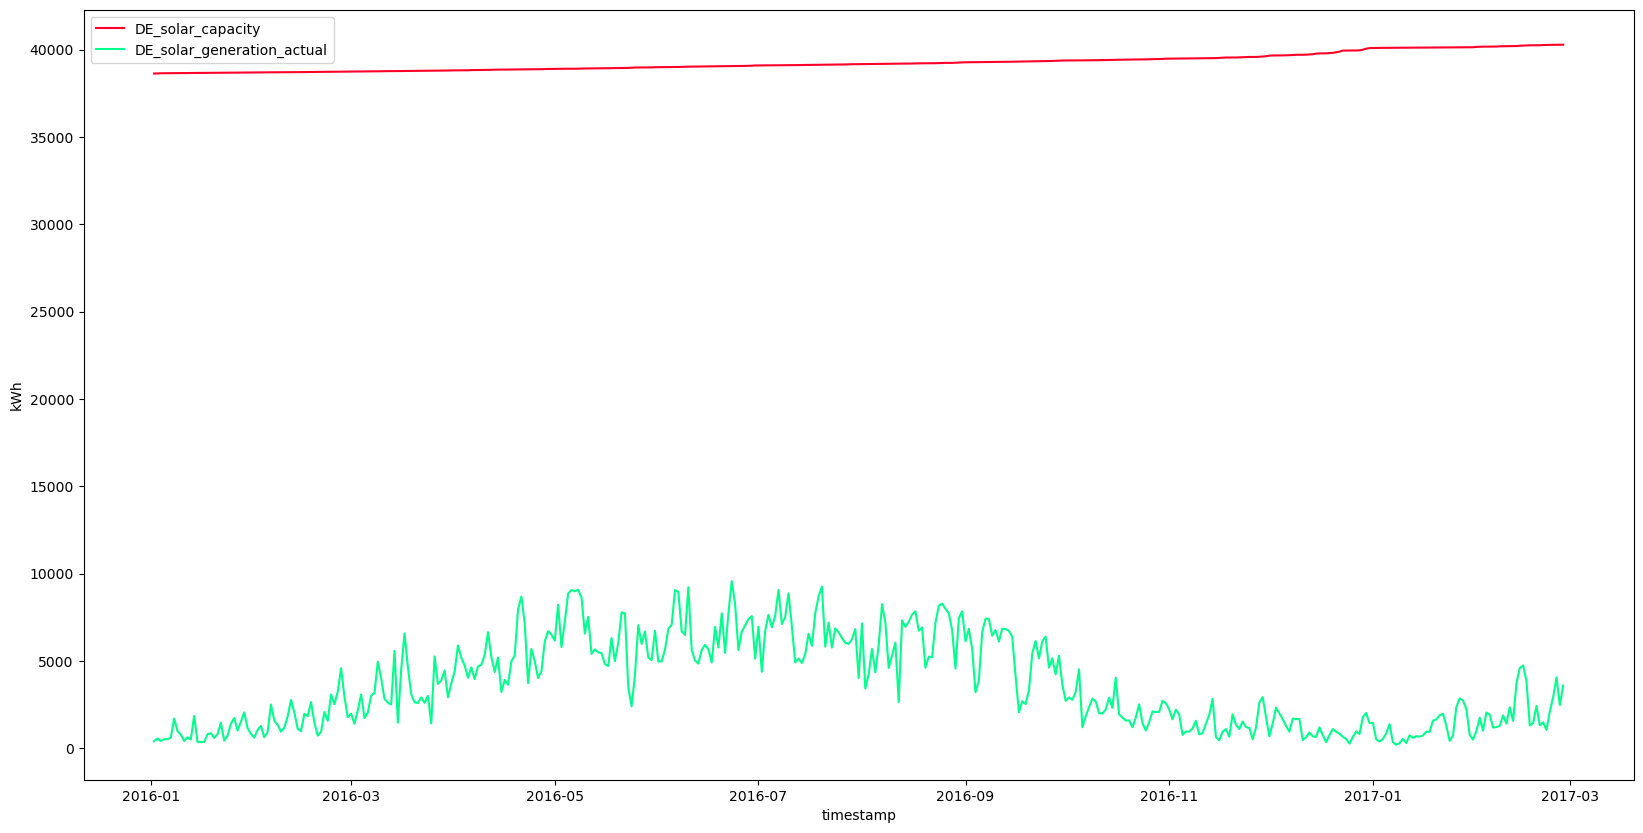

In [375]:
plot_line(daily_t, metric_names, 'solar', )

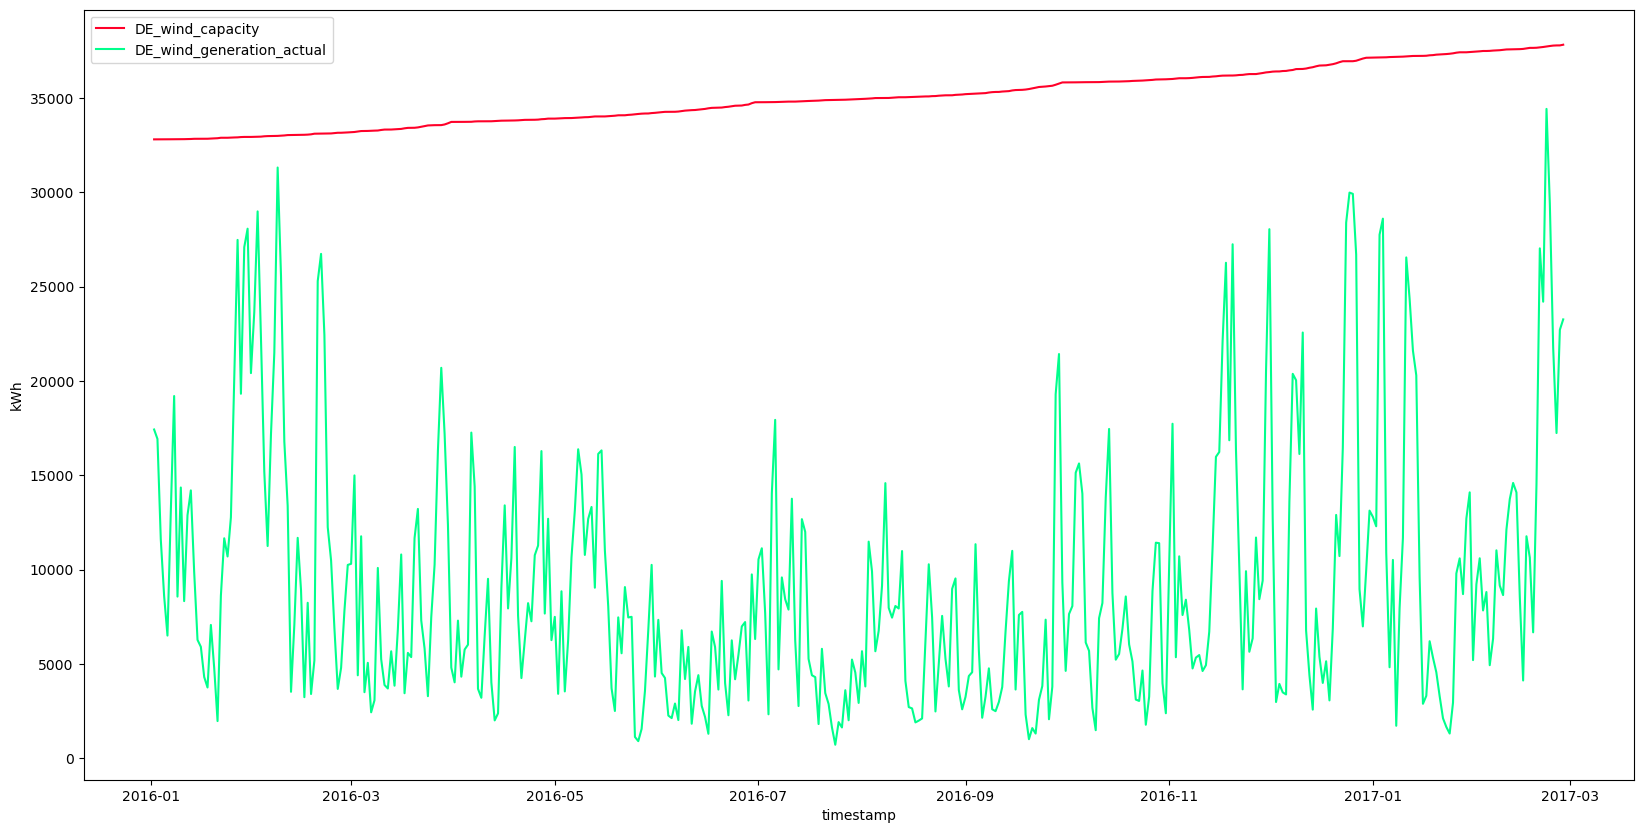

In [376]:
plot_line(daily_t, metric_names, 'wind')

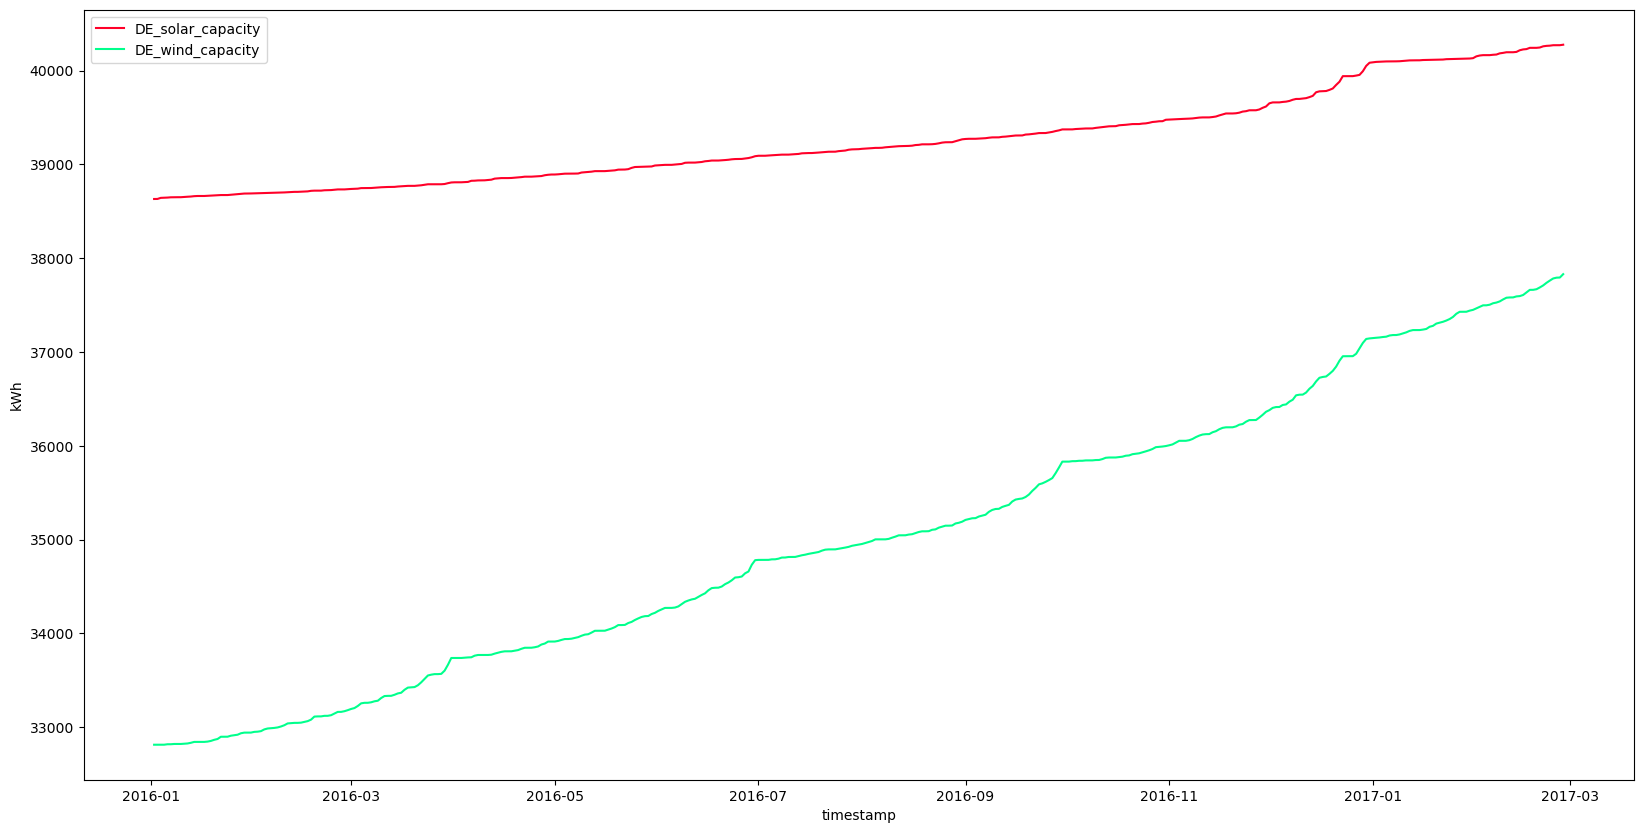

In [377]:
plot_line(daily_t, metric_names, 'capacity')

# Relation between wind/solar capacity and import/export/consumption/generation

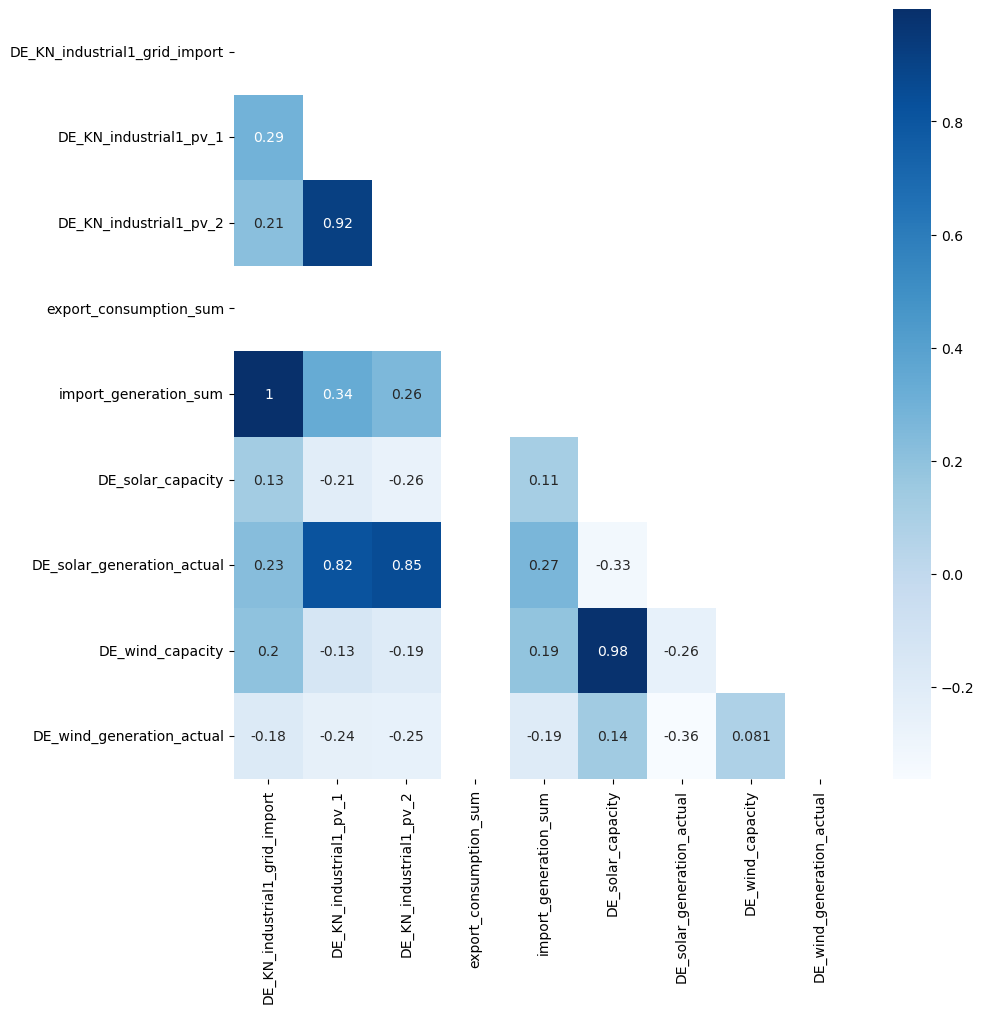

In [363]:
corr = householdL[0].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

For industrial1: `solar generation actual` is highly correlated with `generation`

In [277]:
corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True)).set_precision(2)

,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,export_consumption_sum,import_generation_sum,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
DE_KN_industrial1_grid_import,1.00,0.29,0.21,nan,1.00,0.13,0.23,0.20,-0.18
DE_KN_industrial1_pv_1,0.29,1.00,0.92,nan,0.34,-0.21,0.81,-0.13,-0.24
DE_KN_industrial1_pv_2,0.21,0.92,1.00,nan,0.26,-0.26,0.85,-0.19,-0.25
export_consumption_sum,nan,nan,nan,nan,nan,nan,nan,nan,nan
import_generation_sum,1.00,0.34,0.26,nan,1.00,0.11,0.27,0.19,-0.19
DE_solar_capacity,0.13,-0.21,-0.26,nan,0.11,1.00,-0.33,0.98,0.14
DE_solar_generation_actual,0.23,0.81,0.85,nan,0.27,-0.33,1.00,-0.25,-0.36
DE_wind_capacity,0.20,-0.13,-0.19,nan,0.19,0.98,-0.25,1.00,0.08
DE_wind_generation_actual,-0.18,-0.24,-0.25,nan,-0.19,0.14,-0.36,0.08,1.00


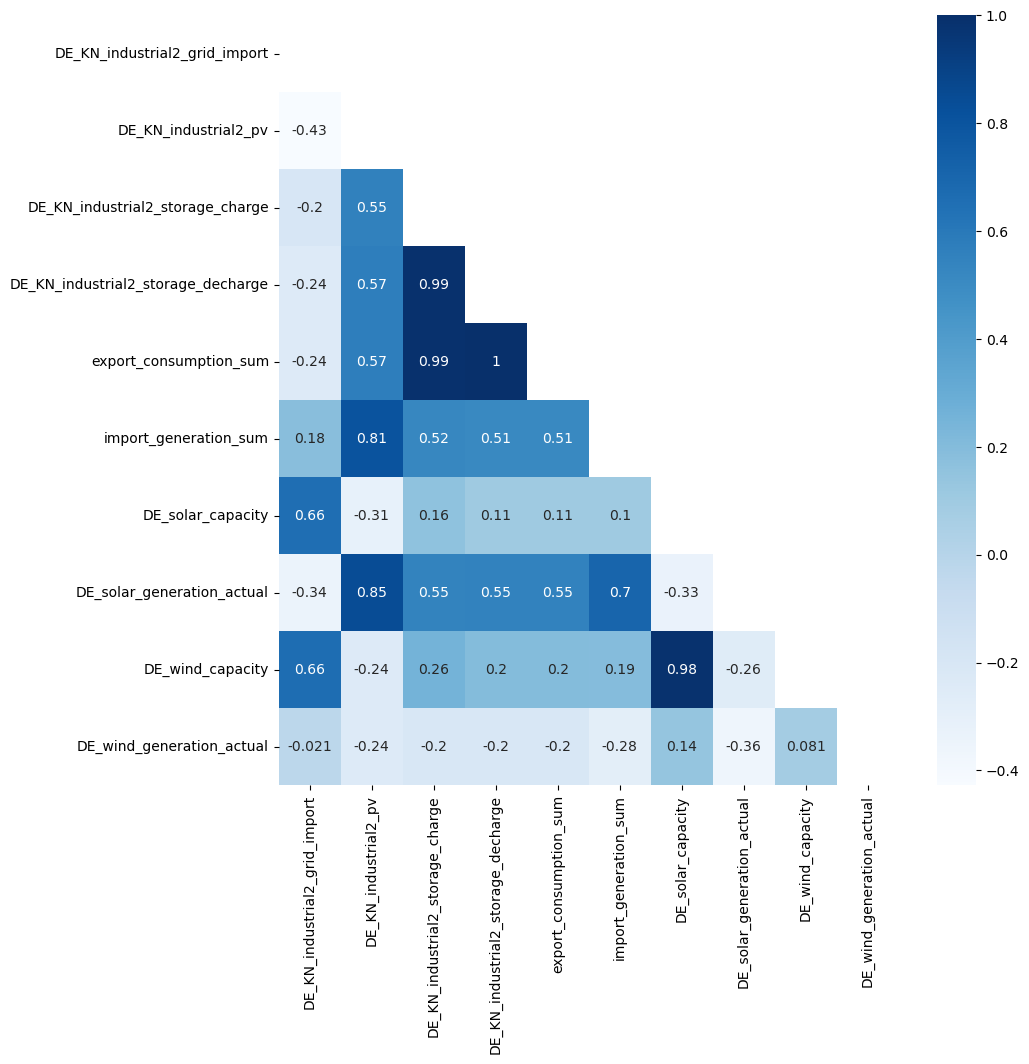

In [364]:
corr = householdL[1].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,
                            dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

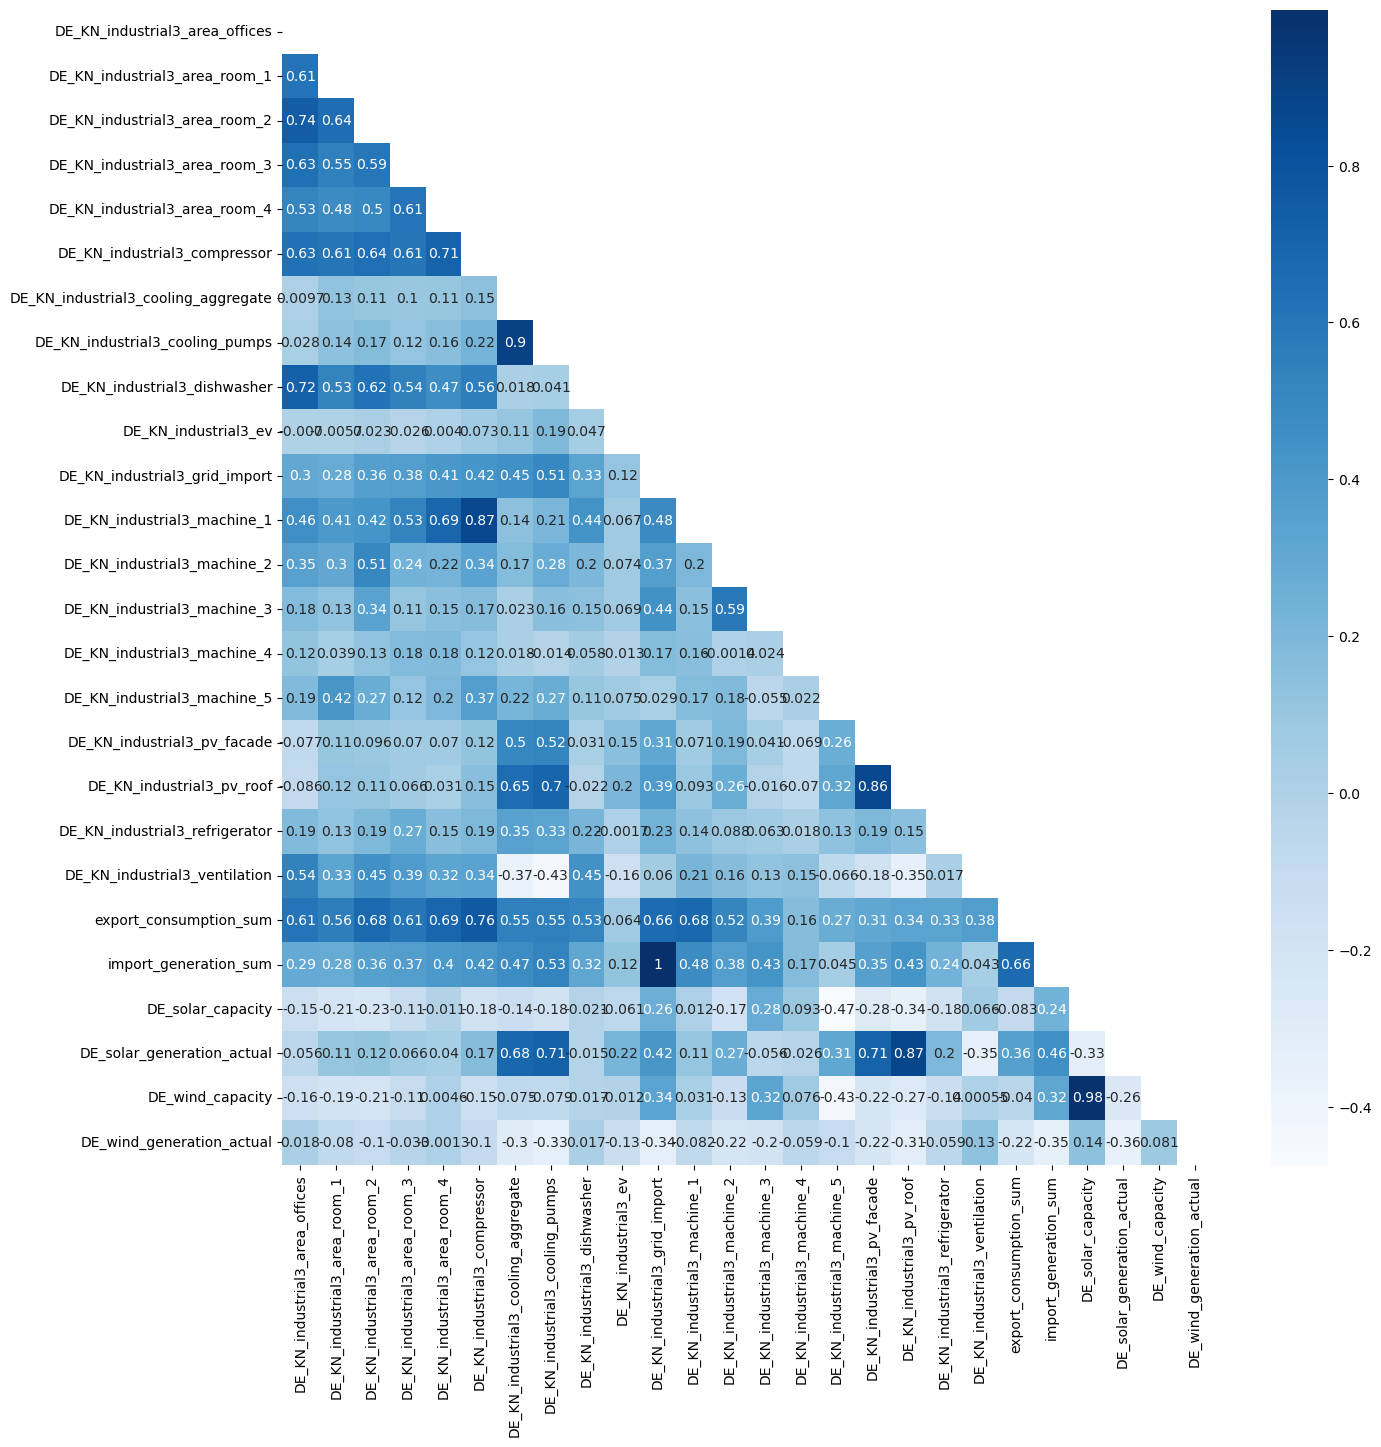

In [365]:
corr = householdL[2].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(15,15));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

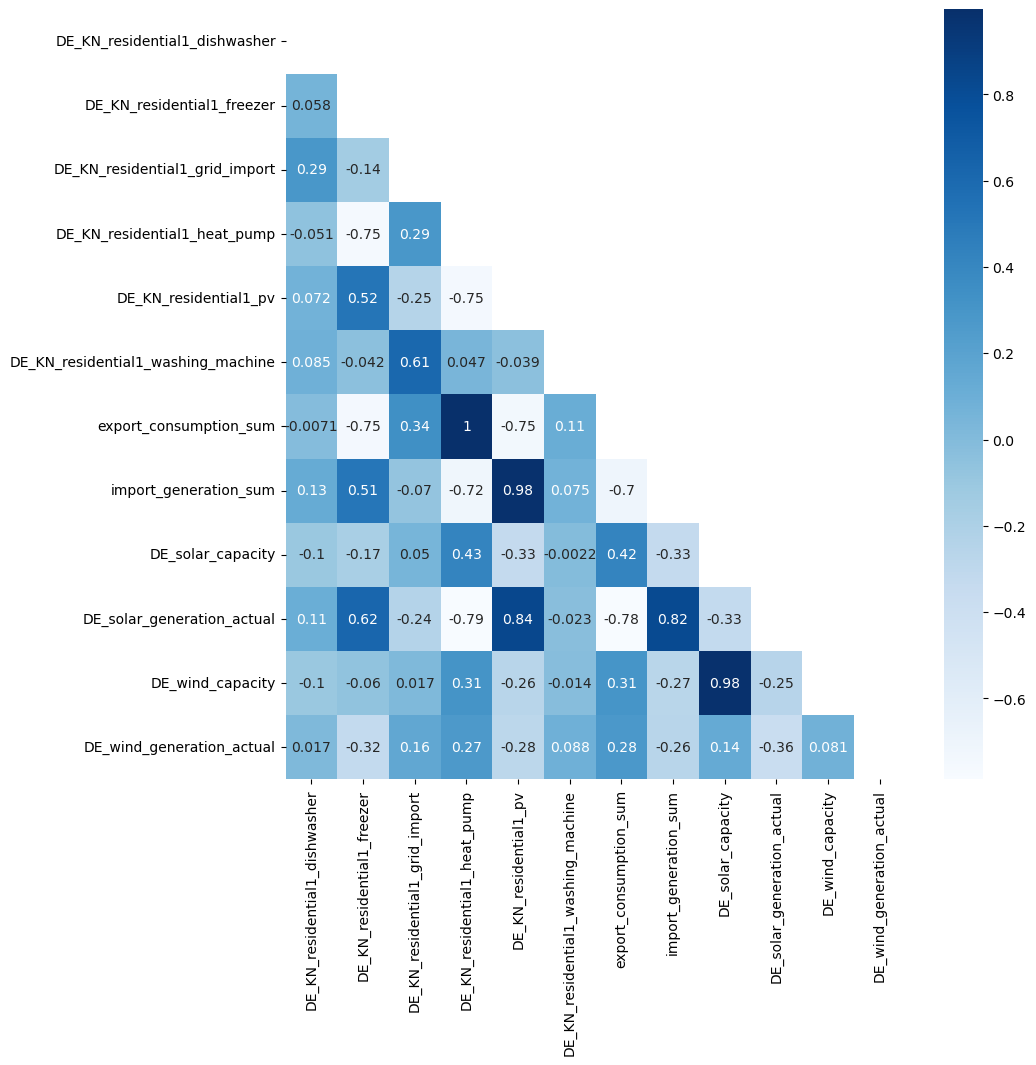

In [281]:
corr = householdL[5].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

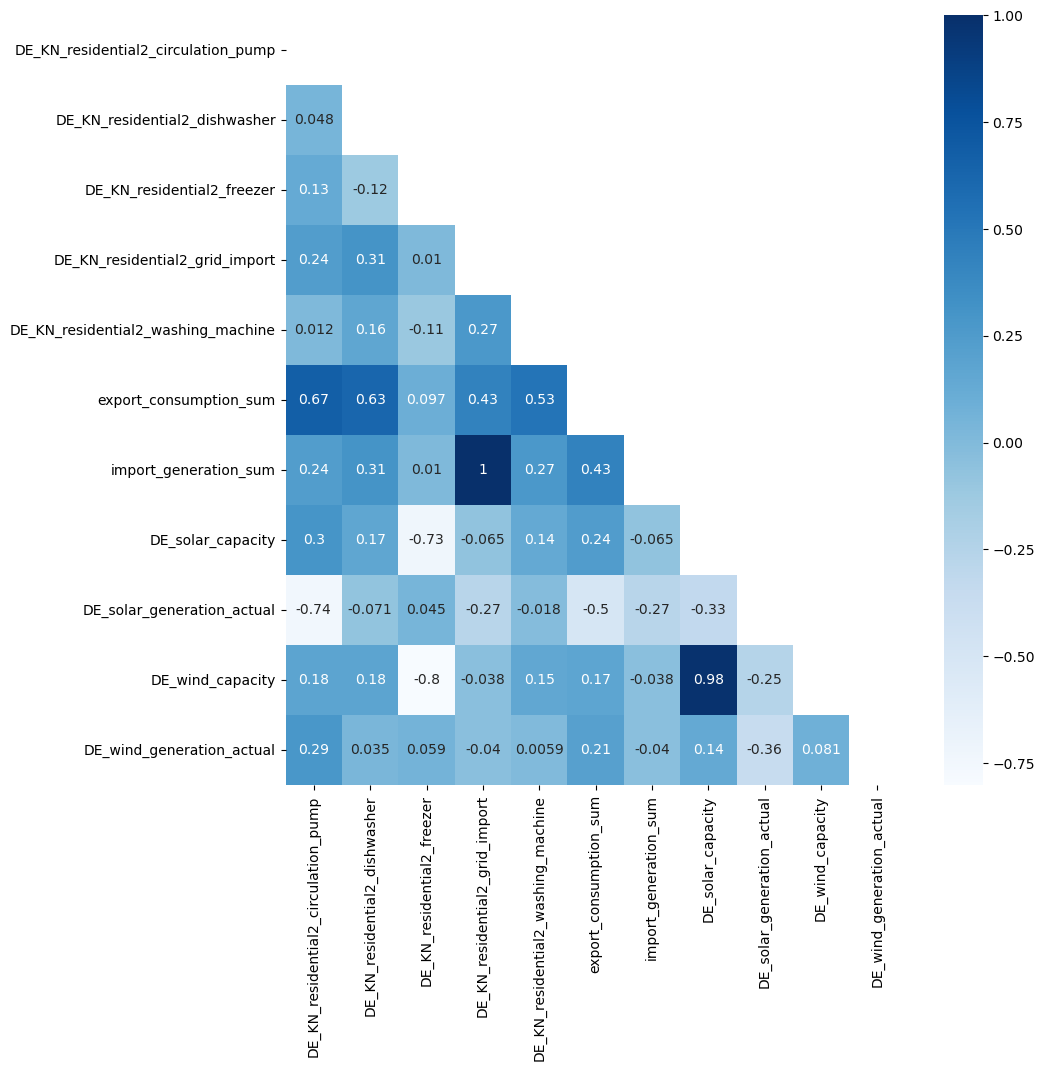

In [282]:
corr = householdL[6].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

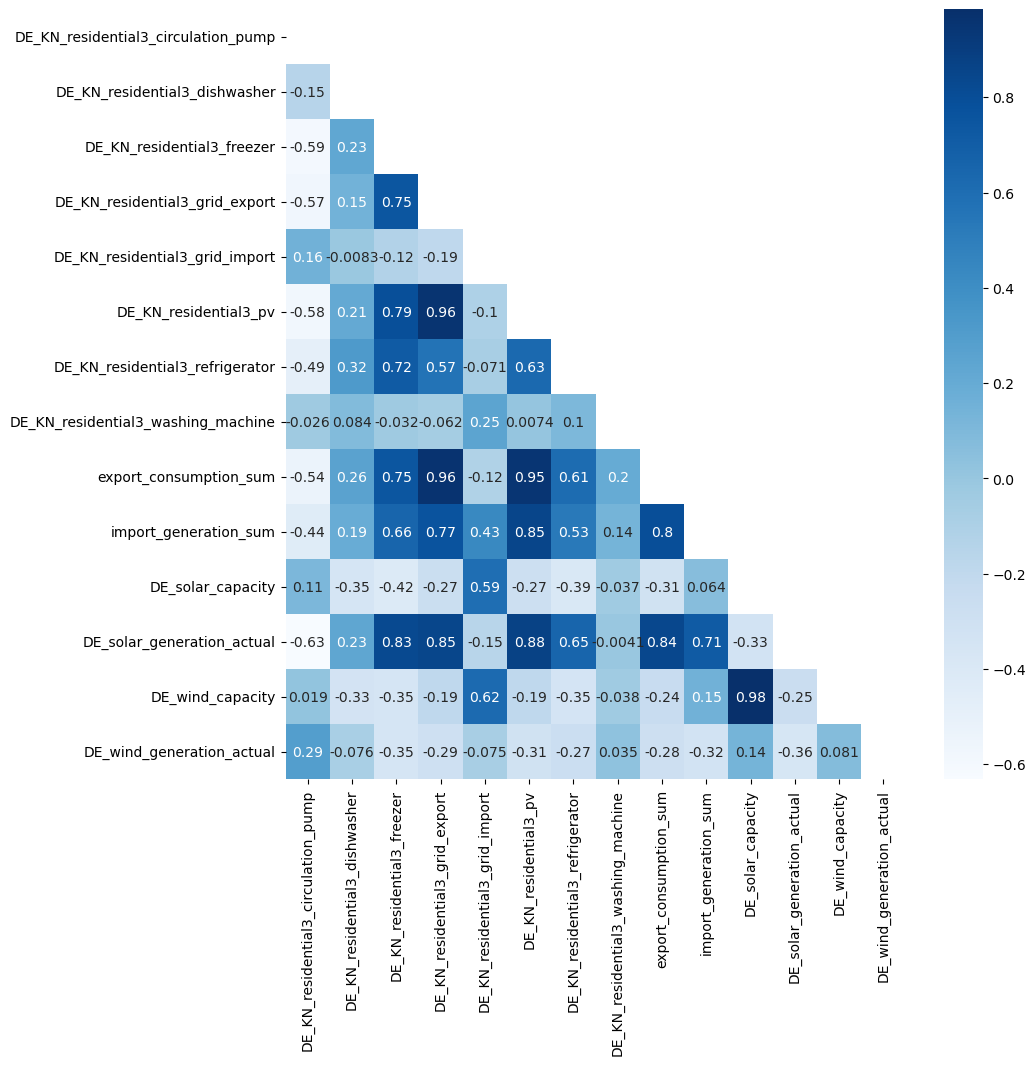

In [283]:
corr = householdL[7].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

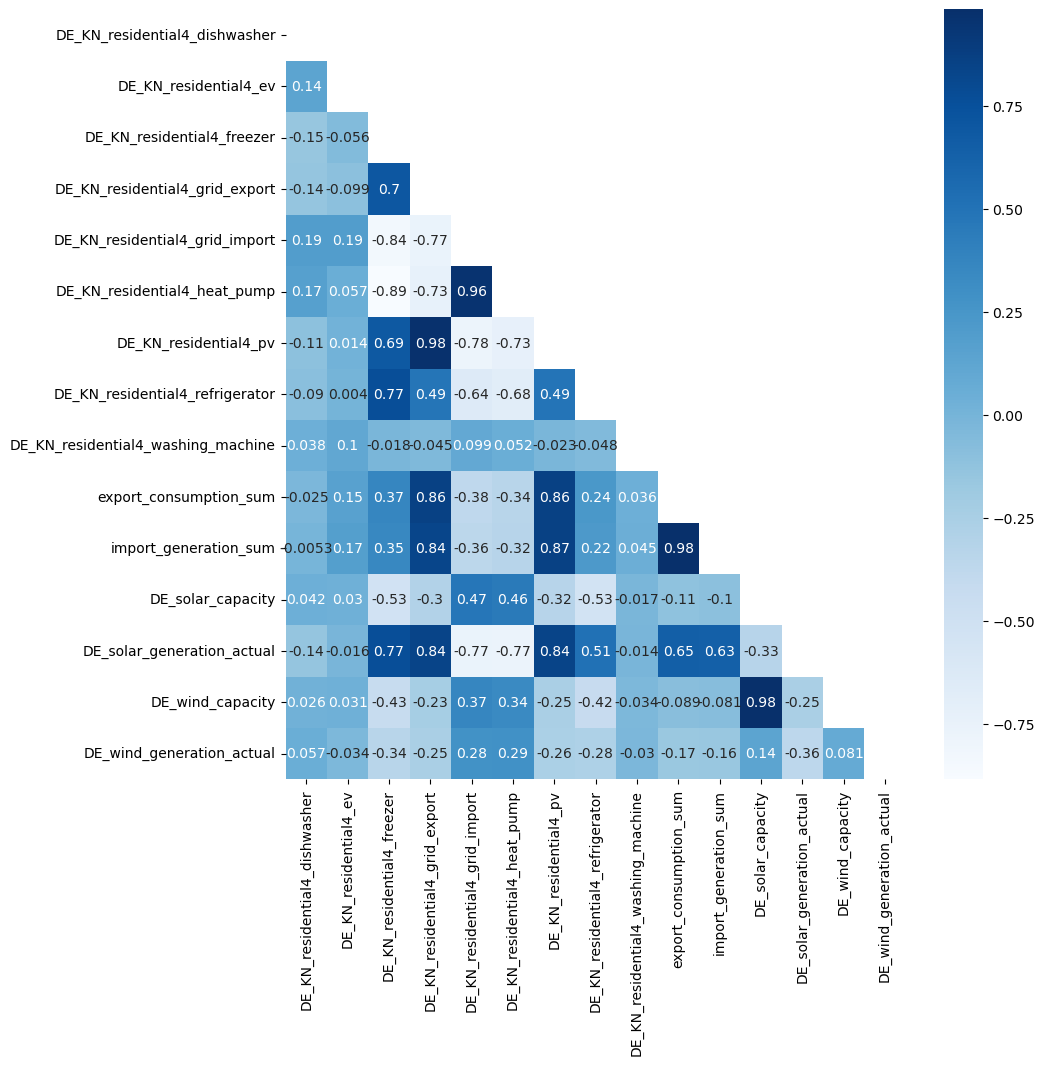

In [284]:
corr = householdL[8].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

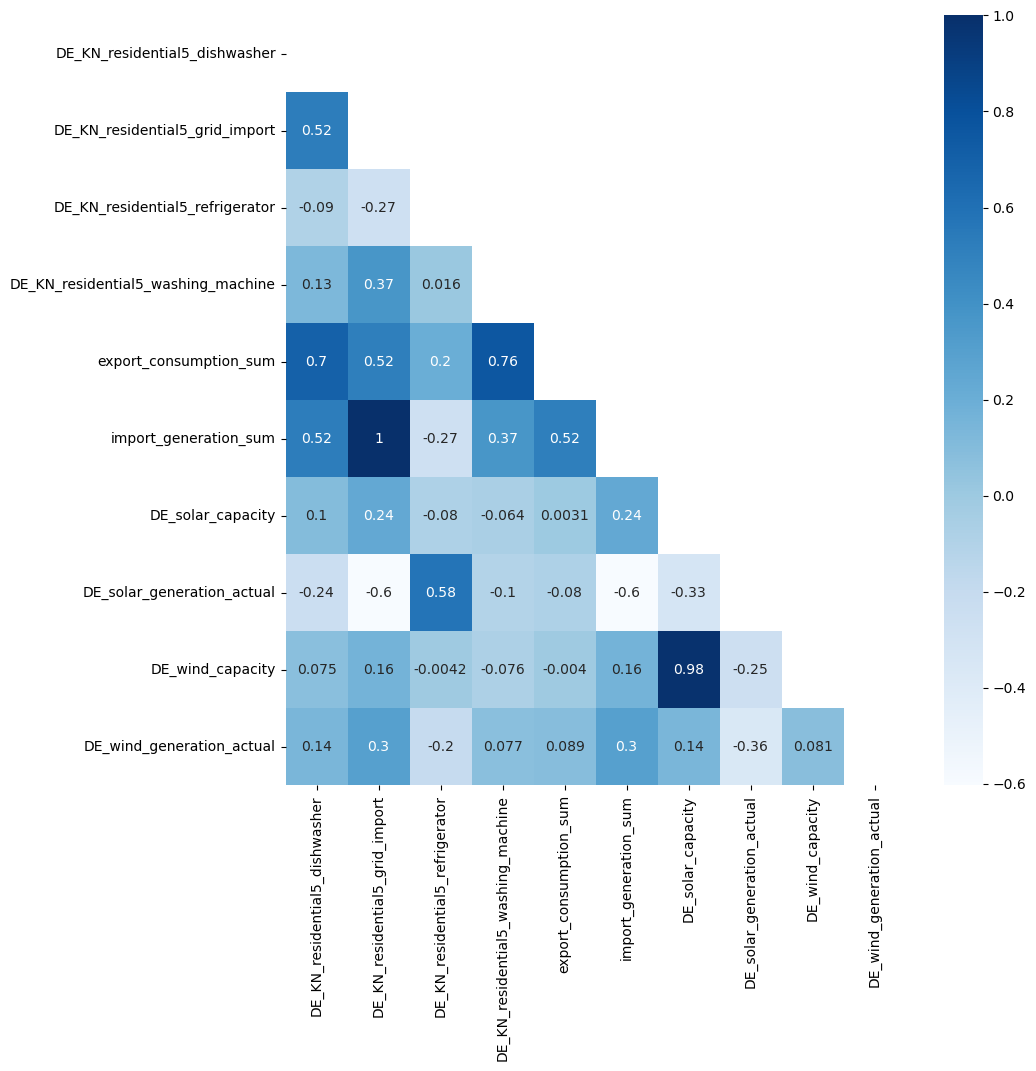

In [285]:
corr = householdL[9].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

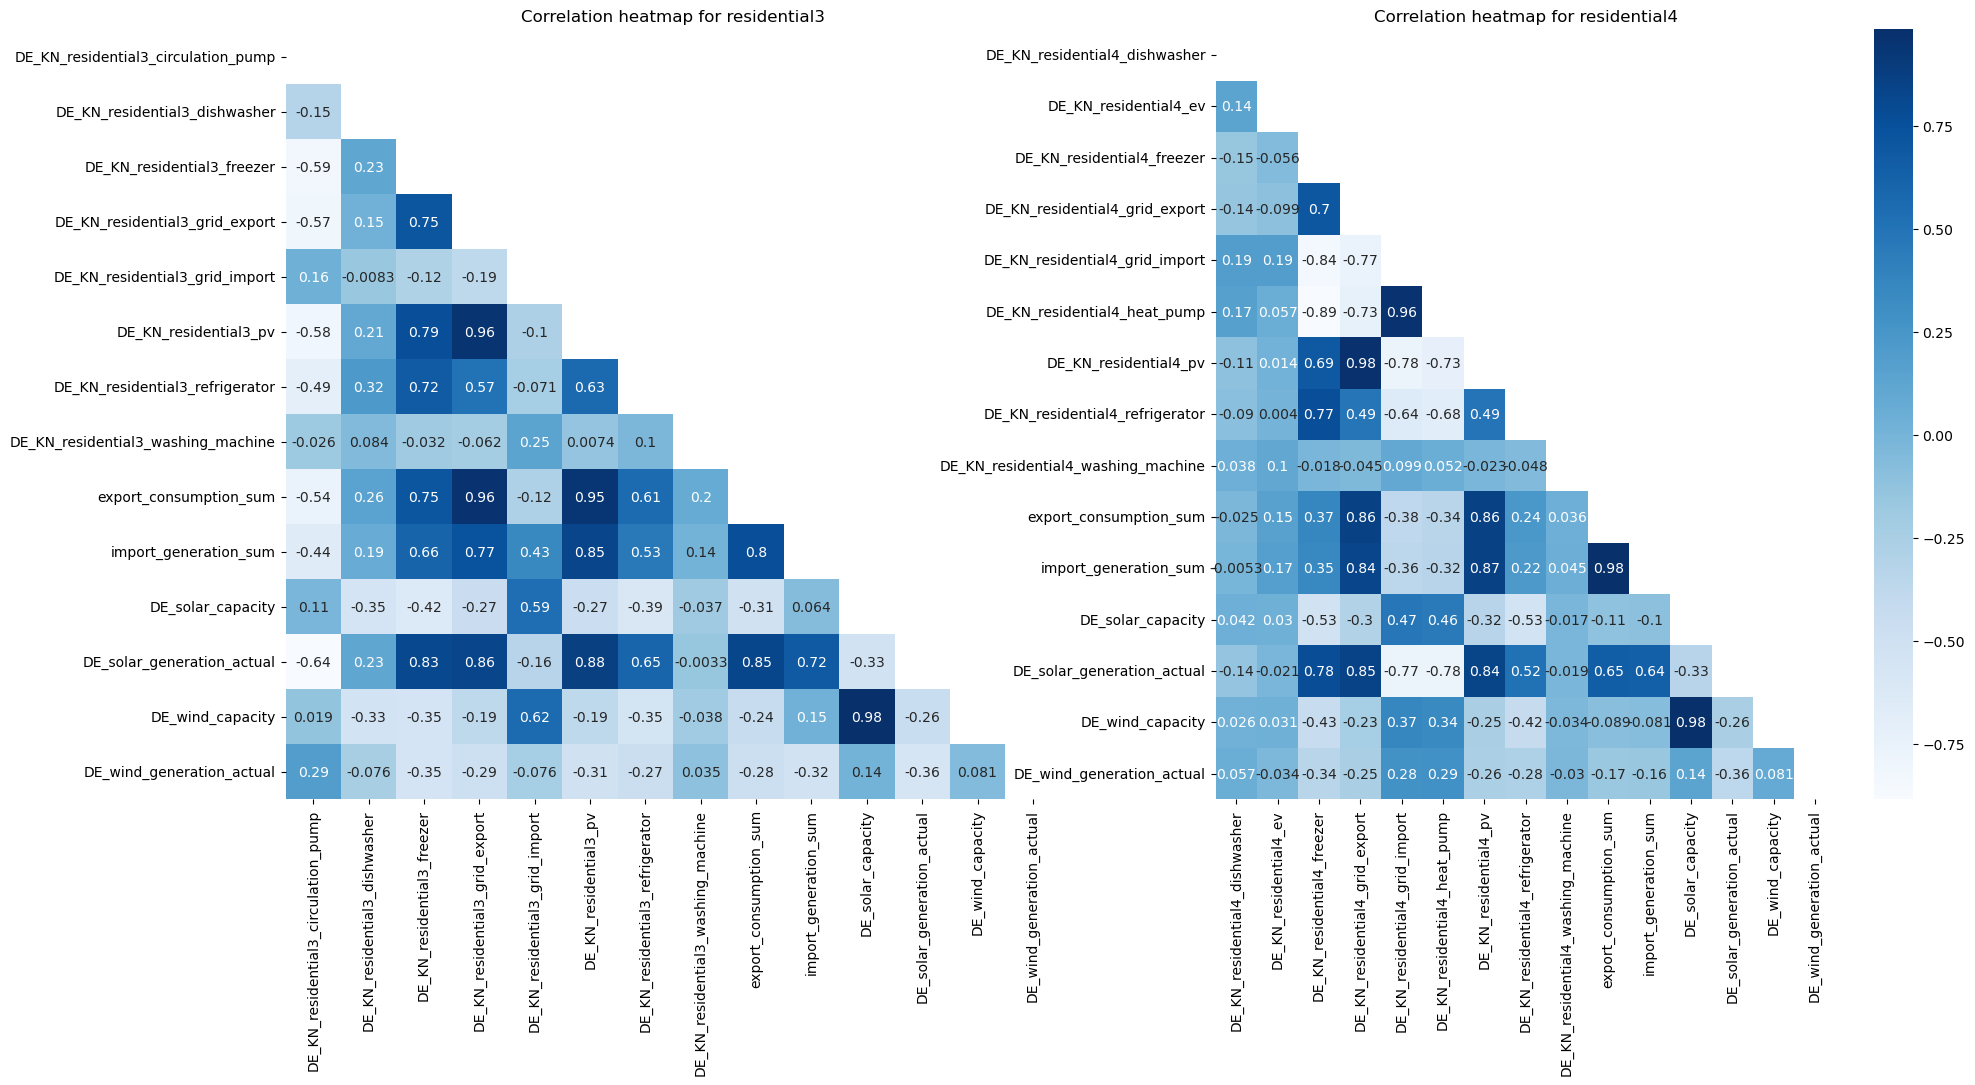

In [374]:


corr1 = householdL[7].set_index('day').join(daily_t.set_index('day')).corr()
corr2 = householdL[8].set_index('day').join(daily_t.set_index('day')).corr()

mask1 = np.triu(np.ones_like(corr1, dtype=np.bool))
mask2 = np.triu(np.ones_like(corr2, dtype=np.bool))


#sns.heatmap(corr1, mask=mask, cmap='Blues', annot=True);

# Generate a mask for the upper triangle

fig,ax = plt.subplots(1,2, figsize=(22,10));
sns.heatmap(corr1, mask=mask1, cmap='Blues', annot=True, ax=ax[0], cbar=False);
sns.heatmap(corr2, mask=mask2, cmap='Blues', annot=True, ax=ax[1]);

ax[0].set(title='Correlation heatmap for residential3');
ax[1].set(title='Correlation heatmap for residential4');

We have 11 different households. Some of them have photovoltaic energy generation for themselves and some of them have energy exported to the public grid. They also don't necessarily hold exact same electrical appliances on file. But in general, the correlations between features do share some similar patterns. The following figure is the correlation between household data from residential1 and residential6.


1. DE_solar_generation_actual is highly postively correlated with household's self pv-generation. Since DE_solar_generation_actual is high during summer and low during winter. And household's self pv-generation depends on abuandence of sunlight. Thus, when sunlight is more abundant in summer, both DE_solar_generation_actual and household's self pv-generation will be high. When sunlight is less abundant in winter, both DE_solar_generation_actual and household's self pv-generation will be low. 

2. The consumption of electric equipments that is more frequently used during summer, namely freezer and refrigerator, during summer tends to be highly possitively related with DE_solar_generation_actual. The consumption of electric equipments that is less frequently used or barely used, i.e heat pump, during summer will be highly negatively correlated with DE_solar_generation_actual. 

3. The household is inclined to import less from public grid when DE_solar_generation_actual is high and vise versa. Due to first observation above, DE_solar_generation_actual is possitively correlated with household's self pv-generation. When the houshold is able to made lots of pv generation by themselves, they are less likely to import much from public grid.

4. The export to public grid is high when DE_solar_generation_actual is high and vise versa. By the first observation, household's self pv-generation is high when DE_solar_generation_actual is high. When the household generates abundant energy by themselves and the internal consumption does not meet the generation, there will be surplus with high possibility. Then the household tends to export the energy back to public grid to both avoiding waste and earning profit.

5. Other than above four obervations, there is no other distinctive large correlation between timeseries dataset and household dataset.